In [1]:
import pandas as pd
import numpy as np
import json
import pandas as pd
import re
from rdkit import Chem
from rdkit.Chem import AllChem
from collections import Counter,defaultdict
from ast import literal_eval
import cobra
from cobra import Metabolite,Reaction,Gene
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import sys
sys.path.append('../retrosynthesis/')

from common import *


# from check_newinfo_getyeast8U import *

In [2]:
### input
yeast870_path =  '../../Data/model/yeast-GEM.yml'
yeast8U_path = '../../Data/model/Yeast-MetaTwin.yml'
sce_gene_clean_ec = '../../Results/ECnumber_prediction/Saccharomyces_cerevisiae_maxsep.csv'
DeepEC_path = '../../Results/ECnumber_prediction/Sce_DeepECv2.txt'


### output
source_fig3g_path = '../../Results/source_data/fig3-g.csv'
yeastMT_ecnumber_frequency_figure_path = '../../Results/Figures/fig3-g.pdf'

In [3]:
yeast8 = cobra.io.load_yaml_model(yeast870_path)
yeast8U = cobra.io.load_yaml_model(yeast8U_path)

### CLEAN gene2ECnumber

In [4]:
clean_gene2ec_dict = get_gene2ec_dict_clean(sce_gene_clean_ec)
clean_ec2gene_dict = get_ec2gene_dict_clean(clean_gene2ec_dict)
print(clean_ec2gene_dict.keys())
print(len(clean_ec2gene_dict))

dict_keys(['5.3.99', '2.3.2', '3.1.2', '2.3.1', '1.12.99', '5.6.2', '3.2.2', '4.2.3', '1.14.15', '2.7.6', '3.5.1', '3.6.4', '3.4.21', '2.1.1', '7.1.2', '2.7.4', '3.4.13', '3.4.22', '3.1.3', '2.4.1', '3.4.16', '3.1.1', '3.2.1', '1.11.1', '3.4.24', '2.7.1', '1.6.5', '3.1.13', '3.1.12', '2.7.7', '7.1.1', '3.1.4', '3.6.1', '4.4.1', '5.2.1', '2.7.11', '2.7.10', '4.6.1', '5.3.4', '4.2.2', '3.4.11', '1.16.3', '3.6.5', '2.7.13', '3.4.19', '3.1.26', '5.4.99', '1.10.3', '7.6.2', '4.1.3', '3.1.21', '2.4.2', '2.7.8', '4.2.1', '6.2.1', '2.5.1', '1.14.99', '5.6.1', '1.13.12', '1.3.7', '6.1.1', '1.8.3', '1.3.99', '1.1.1', '1.14.13', '1.2.1', '1.14.14', '1.2.4', '1.4.4', '7.2.1', '1.4.1', '3.1.11', '2.1.3', '1.11.2', '3.4.23', '3.4.14', '1.7.5', '4.5.1', '4.1.1', '1.17.5', '1.3.1', '1.5.5', '5.1.3', '6.3.4', '1.16.1', '6.3.2', '3.4.25', '3.3.2', '1.8.1', '1.97.1', '4.1.2', '5.5.1', '2.7.12', '1.4.3', '1.14.16', '4.99.1', '1.8.4', '1.3.5', '1.15.1', '2.6.1', '1.1.99', '6.3.1', '1.23.5', '6.4.1', '2.3.3

### ECnumber reaction frequency

In [5]:
# Process reactions for yeast8U
yeast8U_ec_frequency_dict = process_reactions_to_ec_frequency(yeast8U.reactions, clean_gene2ec_dict)

# Process reactions for yeast8
yeast8_ec_frequency_dict = process_reactions_to_ec_frequency(yeast8.reactions, clean_gene2ec_dict)

yeast8U_yeast8_ec_frequency = {'EC':[],
                               'yeast8':[],
                               'yeast8U':[]}
for k,v in yeast8U_ec_frequency_dict.items():
    yeast8U_yeast8_ec_frequency['EC'].append(k)
    yeast8U_yeast8_ec_frequency['yeast8U'].append(v)
    if k in yeast8_ec_frequency_dict.keys():
        yeast8U_yeast8_ec_frequency['yeast8'].append(yeast8_ec_frequency_dict[k])
    else:
        yeast8U_yeast8_ec_frequency['yeast8'].append(0)

yeast8U_yeast8_ec_frequency_df = pd.DataFrame(yeast8U_yeast8_ec_frequency)
yeast8U_yeast8_ec_frequency_df['ratio'] = yeast8U_yeast8_ec_frequency_df.apply(
    lambda row: row['yeast8U'] / row['yeast8'] if row['yeast8'] != 0 else 0,
    axis=1
)
yeast8U_yeast8_ec_frequency_df.to_csv(source_fig3g_path,index=None)
yeast8U_yeast8_ec_frequency_df.head(10)

,EC,yeast8,yeast8U,ratio
0,1.8.99,0,619,0.000000
1,1.1.1,158,454,2.873418
2,1.1.99,11,433,39.363636
3,1.14.13,6,396,66.000000
4,1.14.11,2,390,195.000000
5,1.11.2,1,263,263.000000
6,1.97.1,0,258,0.000000
7,1.11.1,11,228,20.727273
8,1.14.14,3,224,74.666667
9,1.3.1,27,201,7.444444


### fig3g

In [6]:
yeast8U_yeast8_ec_frequency_df = pd.read_csv(source_fig3g_path)

In [7]:
yeast8U_yeast8_ec_frequency_df

,EC,yeast8,yeast8U,ratio
0,1.8.99,0,619,0.000000
1,1.1.1,158,454,2.873418
2,1.1.99,11,433,39.363636
3,1.14.13,6,396,66.000000
4,1.14.11,2,390,195.000000
...,...,...,...,...
149,7.5.2,3,113,37.666667
150,7.2.2,16,100,6.250000
151,7.2.1,6,91,15.166667
152,7.1.2,5,5,1.000000


In [8]:
# Extract the first digit of the EC number
yeast8U_yeast8_ec_frequency_df['EC_first_digit'] = yeast8U_yeast8_ec_frequency_df['EC'].str.split('.').str[0]

# Group by the first digit of the EC number and sum the values
yeast8U_yeast8_ec_frequency_df_first = yeast8U_yeast8_ec_frequency_df.groupby('EC_first_digit')[['yeast8', 'yeast8U']].sum().reset_index()

# Calculate the ratio of 'yeast8' to 'yeast8U'
yeast8U_yeast8_ec_frequency_df_first['yeast8/yeast8U'] = yeast8U_yeast8_ec_frequency_df_first['yeast8'] / yeast8U_yeast8_ec_frequency_df_first['yeast8U']
yeast8U_yeast8_ec_frequency_df_first['yeast8/yeast8U'] = yeast8U_yeast8_ec_frequency_df_first['yeast8/yeast8U'].apply(lambda x: f"{x * 100:.1f}%")

yeast8U_yeast8_ec_frequency_df_first

,EC_first_digit,yeast8,yeast8U,yeast8/yeast8U
0,1,424,4721,9.0%
1,2,1477,9953,14.8%
2,3,909,8367,10.9%
3,4,181,2063,8.8%
4,5,60,1395,4.3%
5,6,130,296,43.9%
6,7,110,1477,7.4%


In [9]:
print(len(yeast8U_yeast8_ec_frequency_df[yeast8U_yeast8_ec_frequency_df['EC_first_digit']=='1']))
print(len(yeast8U_yeast8_ec_frequency_df[yeast8U_yeast8_ec_frequency_df['EC_first_digit']=='2']))
print(len(yeast8U_yeast8_ec_frequency_df[yeast8U_yeast8_ec_frequency_df['EC_first_digit']=='3']))
print(len(yeast8U_yeast8_ec_frequency_df[yeast8U_yeast8_ec_frequency_df['EC_first_digit']=='4']))
print(len(yeast8U_yeast8_ec_frequency_df[yeast8U_yeast8_ec_frequency_df['EC_first_digit']=='5']))
print(len(yeast8U_yeast8_ec_frequency_df[yeast8U_yeast8_ec_frequency_df['EC_first_digit']=='6']))
print(len(yeast8U_yeast8_ec_frequency_df[yeast8U_yeast8_ec_frequency_df['EC_first_digit']=='7']))

53
25
33
15
13
8
7


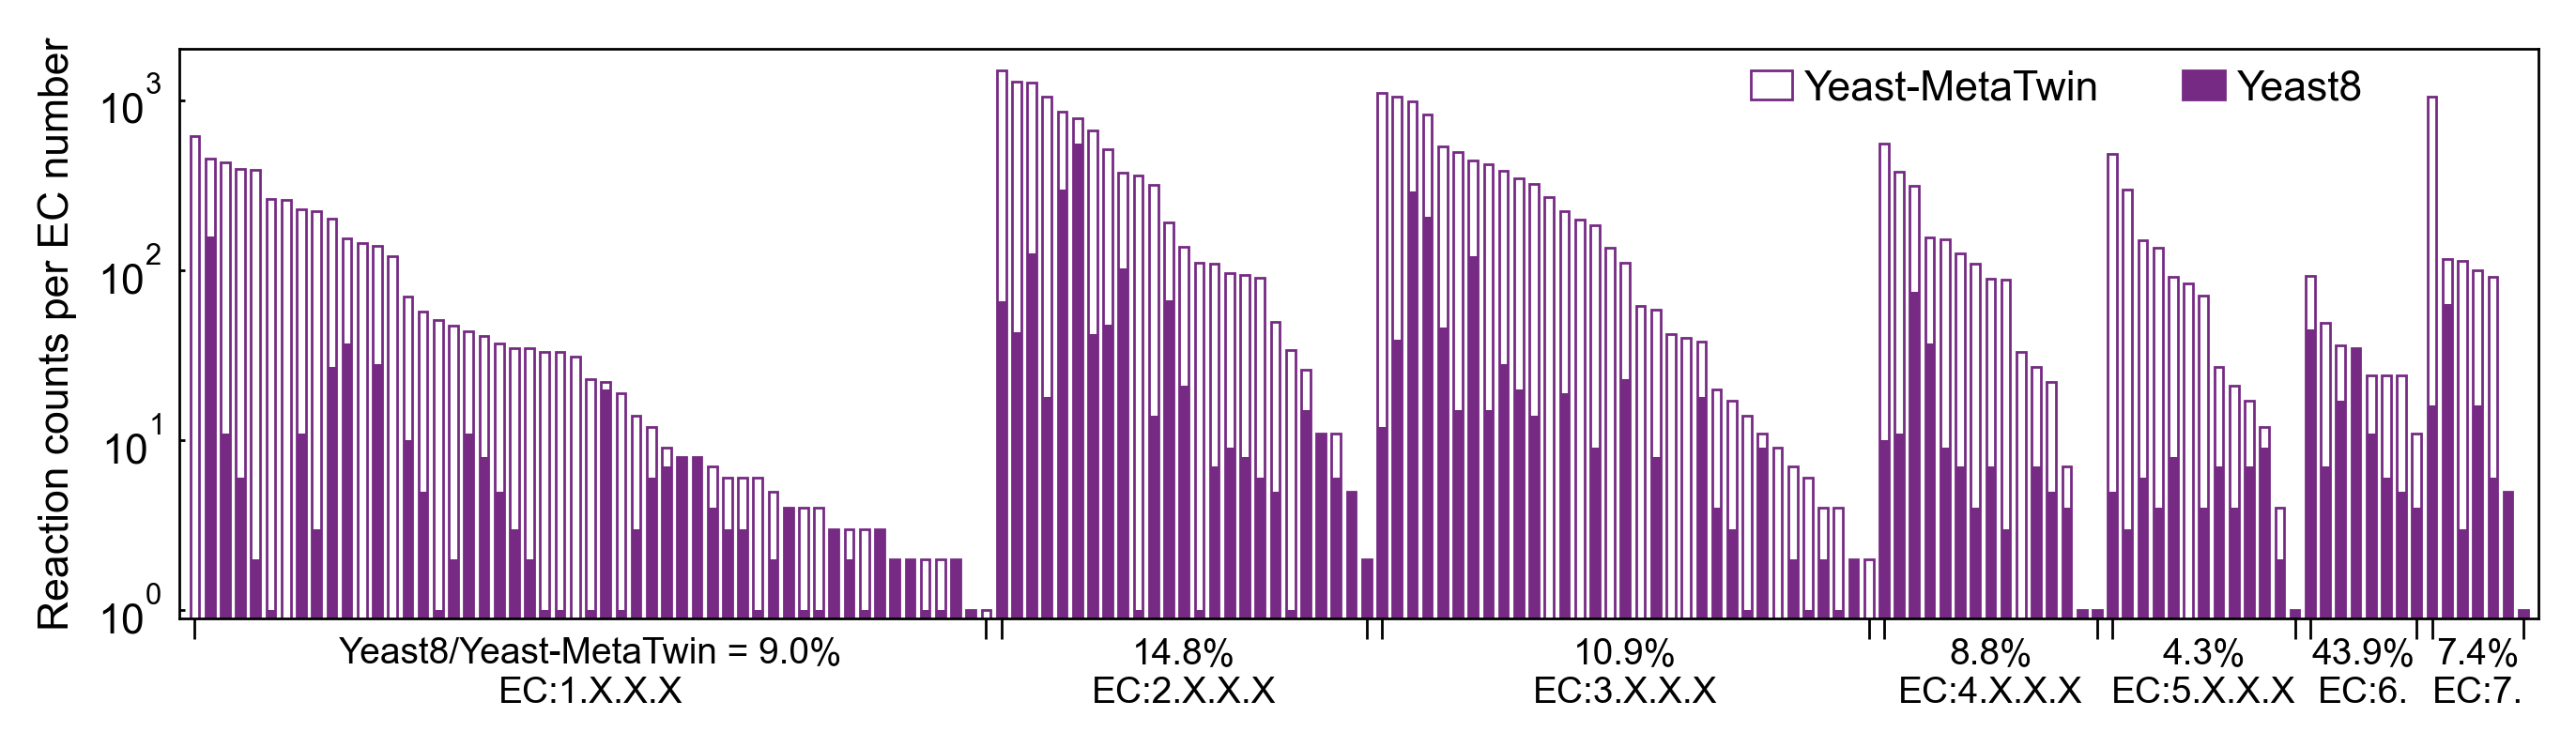

In [11]:
ratio_lst = yeast8U_yeast8_ec_frequency_df_first['yeast8/yeast8U'].tolist()

# Set common parameters
plt.figure(figsize=(6.9, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

# Set axis style
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# Draw stacked bar chart
bar_width = 0.6
index = np.arange(len(yeast8U_yeast8_ec_frequency_df['EC']))

# Define colors and sections
colors = ['#762a83'] * 7
sections = [(0, 52), (52, 77), (77, 110), (110, 125), (125, 138), (138, 146), (146, 154)]

for i, (start, end) in enumerate(sections):
    plt.bar(index[start:end], yeast8U_yeast8_ec_frequency_df['yeast8U'][start:end], width=bar_width, color='white', edgecolor=colors[i], linewidth=0.5)
    plt.bar(index[start:end], yeast8U_yeast8_ec_frequency_df['yeast8'][start:end], width=bar_width, color=colors[i])

# Set y-axis labels
plt.yticks(fontsize=8)

# Set x-axis tick positions and labels
specific_ticks = [0, 52, 53, 77, 78, 110, 111, 125, 126, 138, 139, 146, 147, 153]
plt.xticks(specific_ticks, [''] * len(specific_ticks))

specific_ticks2 = [26, 65, 94, 118, 132, 142.5, 150]
specific_labels2 = [f'Yeast8/Yeast-MetaTwin = {ratio_lst[0]}\nEC:1.X.X.X', f'{ratio_lst[1]}\nEC:2.X.X.X', f'{ratio_lst[2]}\nEC:3.X.X.X', f'{ratio_lst[3]}\nEC:4.X.X.X', 
                    f'{ratio_lst[4]}\nEC:5.X.X.X', f'{ratio_lst[5]}\nEC:6.', f'{ratio_lst[6]}\nEC:7.']
for tick, label in zip(specific_ticks2, specific_labels2):
    plt.text(tick, 0.7, label, ha='center', va='top', fontsize=7, rotation=0)

# Set axis parameters
plt.tick_params(axis='y', direction='in', width=0.5, which='both', length=1)
plt.tick_params(axis='x', which='both', width=0.5, length=4, pad=1)

plt.xlim(-1, 154)
plt.ylim(0.9, 2000)
plt.yscale('log')
plt.minorticks_off()

plt.ylabel('Reaction counts per EC number', fontsize=8)
# plt.ylabel('Reaction counts per EC number in log scale', fontsize=6)

# Set legend
custom_patch1 = mpatches.Patch(facecolor='white', edgecolor='#762a83', linewidth=0.5, label='Yeast-MetaTwin')
custom_patch2 = mpatches.Patch(facecolor='#762a83', edgecolor='#762a83', linewidth=0.5, label='Yeast8')

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Insert custom legend entries
handles.insert(0, custom_patch1)
handles.insert(1, custom_patch2)

# Create legend
plt.legend(handles=handles, frameon=False, fontsize=8, loc='center left', bbox_to_anchor=(0.65, 0.93), ncol=2, labelspacing=0.5, handletextpad=0.3, handlelength=1)

plt.tight_layout()
plt.savefig(yeastMT_ecnumber_frequency_figure_path, dpi=400, bbox_inches='tight')
plt.show()